# Transport Actor notes

In [1]:
using Revise
using FUSE
using Plots;
FUSE.logging(Logging.Info);

### Let's initialize the case with the DIII-D standard Hmode case

This is a standard DIII-D shot with some 5MW of NBI and some Hmode initialized profiles (not from experiment)

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 1.67 [m]                  B0 → -1.71 [T]                 Te0 → 1.8 [keV]                ne0 → 8.16e+19 [m⁻³]           
a → 0.599 [m]                  ip → 1.08 [MA]                 Ti0 → 1.8 [keV]                ne_ped → 5.15e+19 [m⁻³]        
1/ϵ → 2.78 [m]                 q95 → -4.42                    <Te> → 1.14 [keV]              <ne> → 6.19e+19 [m⁻³]          
κ → 1.81                       βpol → 0.501                   <Ti> → 1.14 [keV]              ne0/<ne> → 1.32                
δ → 0.472                      βtor → 0.0107                  Te0/<Te> → 1.58                fGW → 0.704                    
ζ → -0.133                     βn → 1.03                      Ti0/<Ti> → 1.58                zeff_ped → 2                   


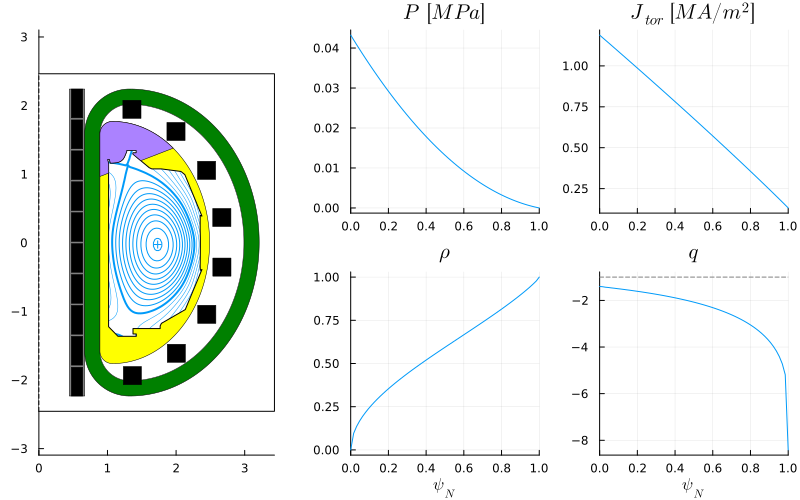

​


10×9 DataFrame
 Row │ group   details  type    ΔR        R_start   R_end     material   area      volume   
     │ String  String   String  Float64   Float64   Float64   String     Float64   Float64  
─────┼──────────────────────────────────────────────────────────────────────────────────────
   1 │ in                       0.444889  0.0       0.444889             1.99071    2.78233
   2 │ in               oh      0.222444  0.444889  0.667333  Copper     0.995354   3.47792
   3 │ hfs              tf      0.222444  0.667333  0.889778  Copper     2.45071   10.2758
   4 │ hfs                      0.0       0.889778  0.889778             2.38542   33.7683
   5 │ hfs              wall    0.111222  0.889778  1.001     Carbon     1.59083   14.8893
   6 │ lhfs             plasma  1.376     1.001     2.377     DD_plasma  2.96116   30.2273
   7 │ lfs              wall    0.111222  2.377     2.48822   Carbon     1.59083   14.8893
   8 │ lfs                      0.5005    2.48822   2.98872        

​


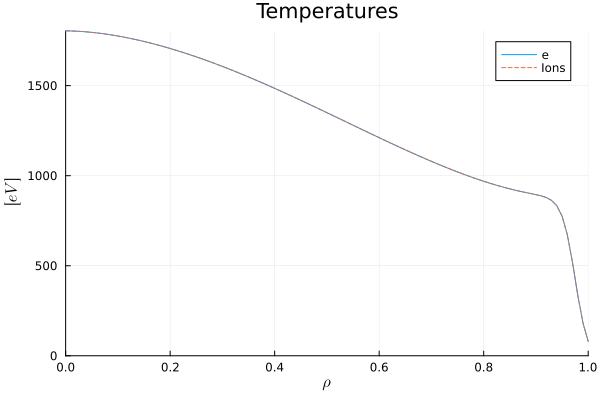

​


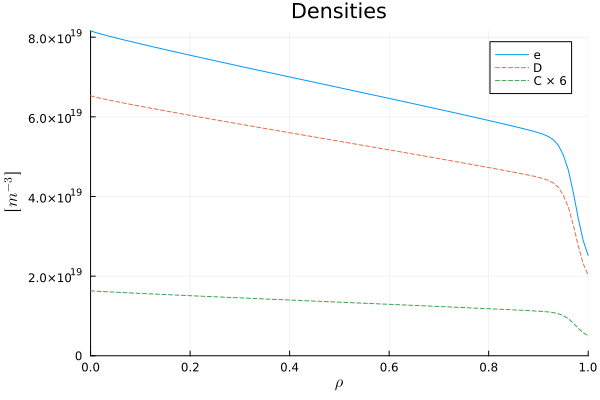

​


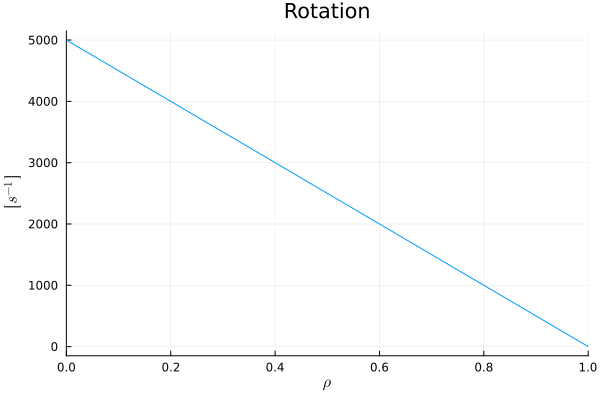

​


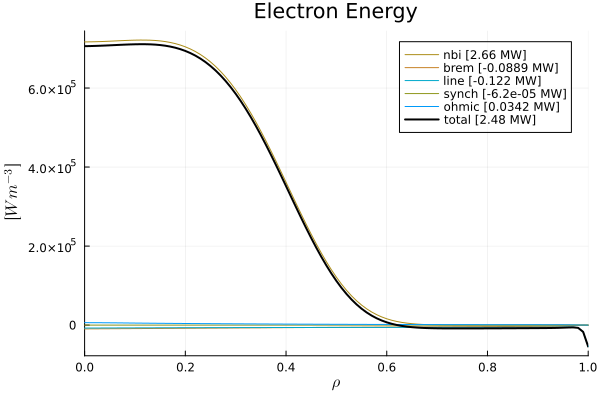

​


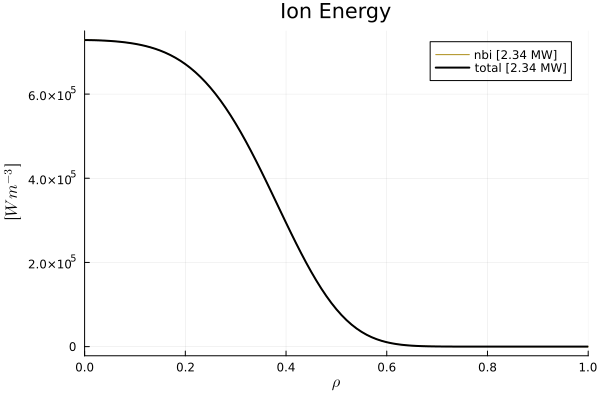

​


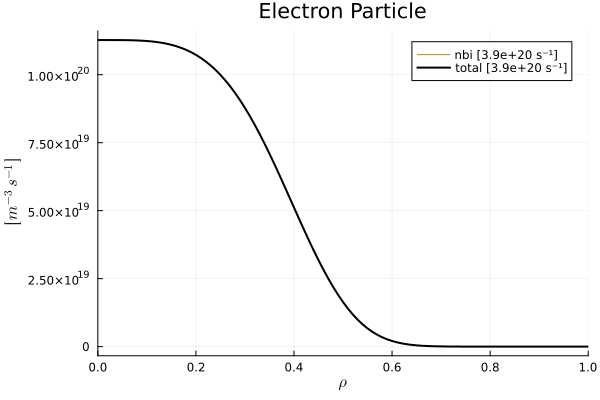

​


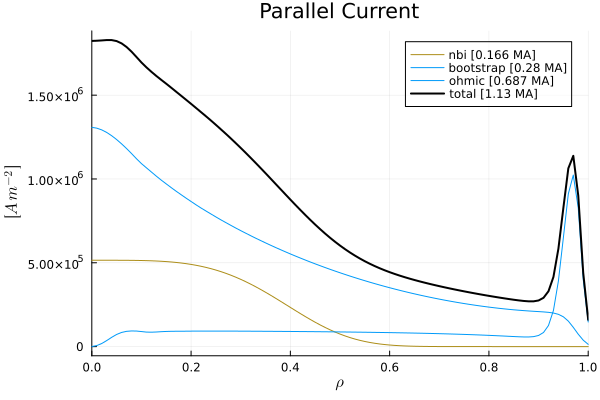

In [2]:
dd, ini, act = FUSE.init(:D3D, do_plot=false);
FUSE.digest(dd);

### Take a look at the parameters of the actors associated with the transport solver
1. ActorFluxMatcher
2. ActorCoreTransport
3. ActorTGLF
4. ActorNeoclassical

In [3]:
display(act.ActorFluxMatcher)
display(act.ActorCoreTransport)
display(act.ActorTauenn)
display(act.ActorTGLF)
display(act.ActorNeoclassical)

ActorFluxMatcher{Float64}
├─ evolve_Ti ➡ :flux_match
├─ evolve_Te ➡ :flux_match
├─ evolve_densities[:]
├─ evolve_rotation ➡ :fixed
├─ rho_transport ➡ 0.2:0.1:0.8
├─ evolve_pedestal ➡ true
├─ max_iterations ➡ 200
├─ optimizer_algorithm ➡ :anderson
├─ step_size ➡ 0.1
├─ do_plot ➡ false
└─ verbose ➡ false


ActorCoreTransport{Float64}
└─ model ➡ :Tauenn


ActorTauenn{Float64}
├─ error ➡ 0.01
├─ eped_factor ➡ 1.0
├─ rho_fluxmatch ➡ 0.6
├─ T_shaping ➡ 1.8
├─ temp_pedestal_ratio ➡ 1.0
├─ transport_model ➡ :tglfnn
├─ warn_nn_train_bounds ➡ false
├─ update_pedestal ➡ true
├─ confinement_factor ➡ 1.0
├─ do_plot ➡ false
└─ verbose ➡ false


ActorTGLF{Float64}
├─ nn ➡ true
├─ sat_rule ➡ :sat1
├─ electromagnetic ➡ true
├─ rho_transport ➡ 0.2:0.1:0.8
└─ warn_nn_train_bounds ➡ false


ActorNeoclassical{Float64}
├─ neoclassical_model ➡ :changhinton
└─ rho_transport ➡ 0.2:0.1:0.8


#### Compare tauenn with different models

ActorTauenn{Float64}
├─ error ➡ 0.01
├─ eped_factor ➡ 1.0
├─ rho_fluxmatch ➡ 0.6
├─ T_shaping ➡ 1.8
├─ temp_pedestal_ratio ➡ 1.0
├─ transport_model ➡ :tglf
├─ warn_nn_train_bounds ➡ false
├─ update_pedestal ➡ true
├─ confinement_factor ➡ 1.0
├─ do_plot ➡ false
└─ verbose ➡ false


 25.150196 seconds (52.79 M allocations: 2.698 GiB, 5.17% gc time, 95.58% compilation time)
  1.181923 seconds (1.08 M allocations: 65.971 MiB)
GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 1.67 [m]                  B0 → -1.71 [T]                 Te0 → 2.42 [keV]               ne0 → 8.16e+19 [m⁻³]           
a → 0.599 [m]                  ip → 1.08 [MA]                 Ti0 → 2.42 [keV]               ne_ped → 5.15e+19 [m⁻³]        
1/ϵ → 2.78 [m]                 q95 → -4.42                    <Te> → 1.35 [keV]              <ne> → 6.19e+19 [m⁻³]          
κ → 1.81                       βpol → 0.501                   <Ti> → 1.35 [keV]              ne0/<ne> → 1.32                
δ → 0.472                      βtor → 0.0107                  Te0/<Te> → 1.79                fGW → 0.704  

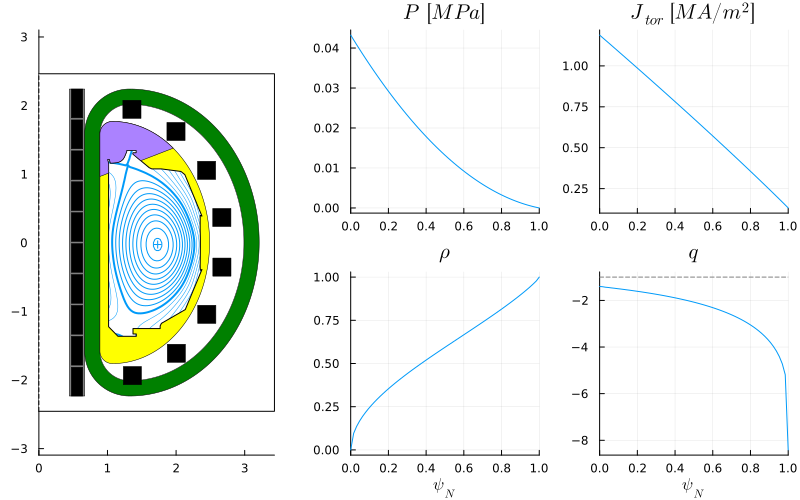

​


10×9 DataFrame
 Row │ group   details  type    ΔR        R_start   R_end     material   area      volume   
     │ String  String   String  Float64   Float64   Float64   String     Float64   Float64  
─────┼──────────────────────────────────────────────────────────────────────────────────────
   1 │ in                       0.444889  0.0       0.444889             1.99071    2.78233
   2 │ in               oh      0.222444  0.444889  0.667333  Copper     0.995354   3.47792
   3 │ hfs              tf      0.222444  0.667333  0.889778  Copper     2.45071   10.2758
   4 │ hfs                      0.0       0.889778  0.889778             2.38542   33.7683
   5 │ hfs              wall    0.111222  0.889778  1.001     Carbon     1.59083   14.8893
   6 │ lhfs             plasma  1.376     1.001     2.377     DD_plasma  2.96116   30.2273
   7 │ lfs              wall    0.111222  2.377     2.48822   Carbon     1.59083   14.8893
   8 │ lfs                      0.5005    2.48822   2.98872        

​


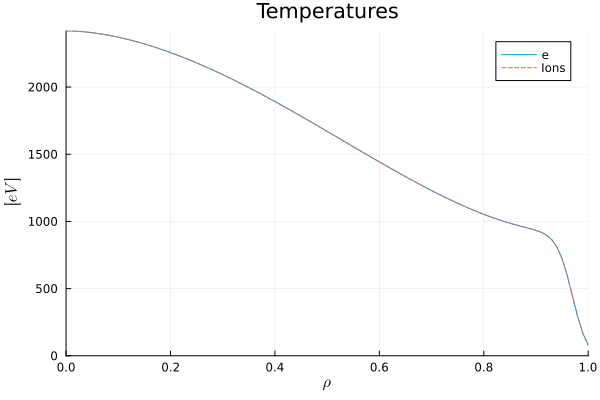

​


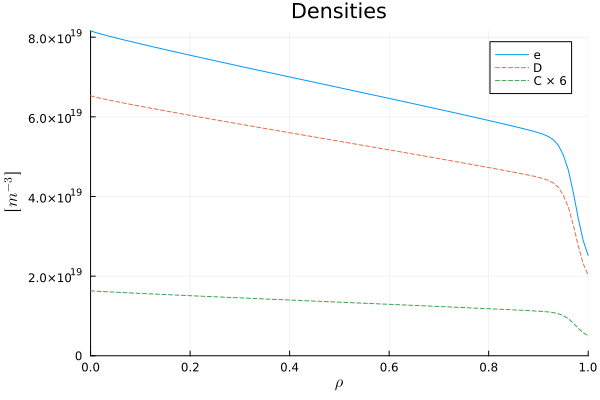

​


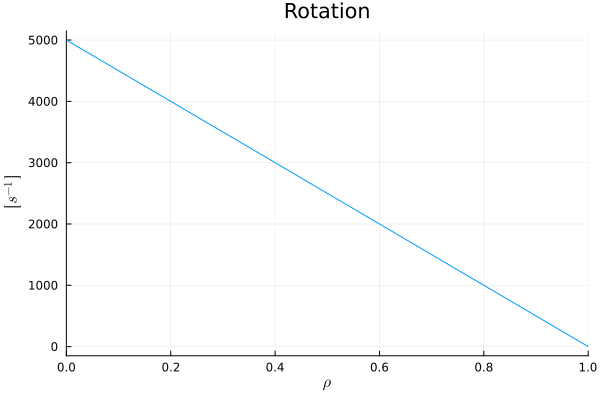

​


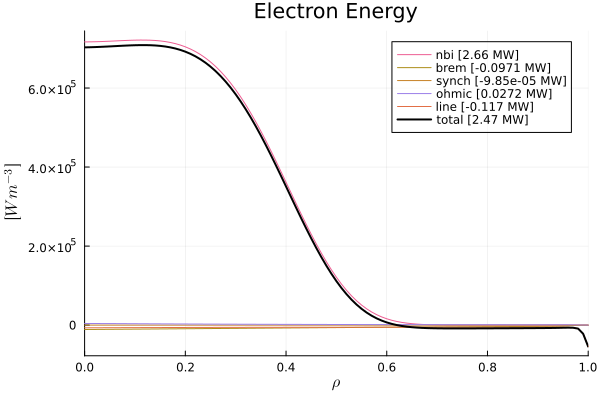

​


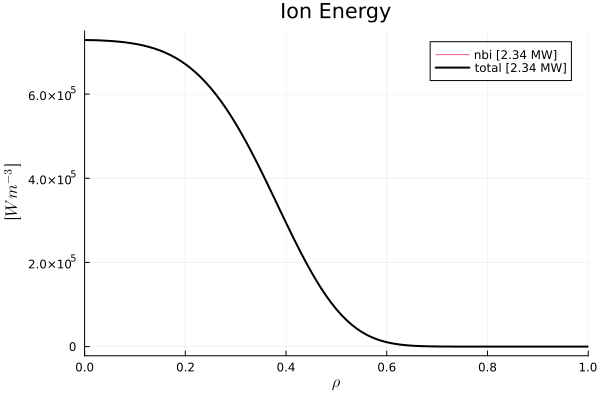

​


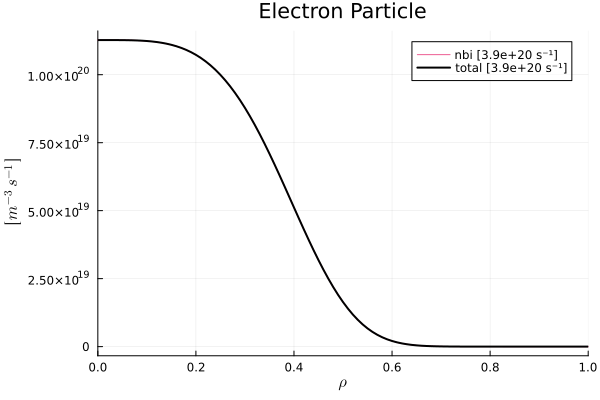

​


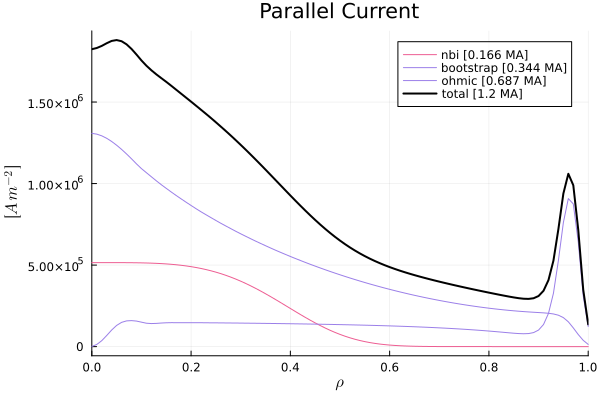

In [4]:
dd_tglfnn = deepcopy(dd)
dd_tglf = deepcopy(dd)
dd_ds03 = deepcopy(dd)
act_tglfnn = deepcopy(act)
act_tglf = deepcopy(act)
act_ds03 = deepcopy(act)

act_tglfnn.ActorTauenn.transport_model = :tglfnn
act_tglf.ActorTauenn.transport_model = :tglf
act_ds03.ActorTauenn.transport_model = :ds03

display(act_tglf.ActorTauenn)

@time FUSE.ActorCoreTransport(dd_tglfnn,act_tglfnn)
#@time FUSE.ActorCoreTransport(dd_tglf,act_tglf)
@time FUSE.ActorCoreTransport(dd_ds03,act_ds03)


plot(dd.core_transport,label="init")
plot!(dd_tglfnn.core_transport,label="tglfnn")
#plot!(dd_tglf.core_transport,label="tglf")
plot!(dd_ds03.core_transport,label="ds03")

plot(dd.core_profiles,label="init")
plot!(dd_tglfnn.core_profiles,label="tglfnn")
#plot!(dd_tglf.core_profiles,label="tglf")
plot!(dd_ds03.core_profiles,label="ds03")

FUSE.digest(dd_tglfnn)

#### act.ActorFluxMatcher defines what is evolved. In this case:
   -  Electron Temperature Te
   -  Ion temperature Ti
   -  Electron density ne

We are keeping the rotation fixed and use Deuterium for quasi neutrality and let Carbon match the ne_scale lengths

#### Setting up the actor parameters in act is next

ActorFluxMatcher{Float64}
├─ evolve_Ti ➡ :flux_match
├─ evolve_Te ➡ :flux_match
├─ evolve_densities[:]
├─ evolve_rotation ➡ :fixed
├─ rho_transport ➡ 0.3:0.1:0.8
├─ evolve_pedestal ➡ false
├─ max_iterations ➡ 1000
├─ optimizer_algorithm ➡ :anderson
├─ step_size ➡ 0.5
├─ do_plot ➡ false
└─ verbose ➡ true


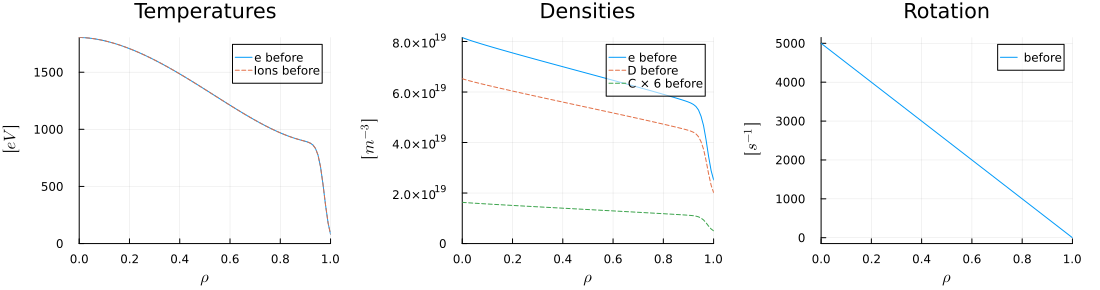

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     1     2.664184e+00              NaN
     2     2.606399e+00     1.390965e+01
     3     2.546947e+00     1.342920e+01
     4     2.485738e+00     1.294933e+01
     5     2.422667e+00     1.247070e+01
     6     2.357637e+00     1.199401e+01
     7     2.290616e+00     1.152011e+01
     8     2.221516e+00     1.105002e+01
     9     2.150256e+00     1.058493e+01
    10     2.076720e+00     1.012618e+01
    11     2.060213e+00     9.675278e+00
    12     2.045156e+00     9.233859e+00
    13     2.030583e+00     8.803698e+00
    14     2.016501e+00     8.386659e+00
    15     2.002918e+00     7.984624e+00
    16     1.989842e+00     7.599238e+00
    17     1.977275e+00     7.231753e+00
    18     1.976786e+00     6.883061e+00
    19     1.979126e+00     6.553634e+00
    20     1.980777e+00     6.243529e+00
    21     1.981771e+00     5.952397e+00
    22     1.982140e+00     5.679632e+00
    23     1.98192

Results of Nonlinear Solver Algorithm
 * Algorithm: Anderson m=0 beta=-0.5 aa_start=1 droptol=1.0e10
 * Starting Point: [-104.60344411023704, -131.24882867630555, -154.12359013108767, -169.82344220550024, -171.45785206720558, -146.7229279383185, -104.60344411023704, -131.24882867630555, -154.12359013108767, -169.82344220550024, -171.45785206720558, -146.7229279383185, -56.168169417612944, -57.696422536691884, -59.91746988230746, -62.89789027058666, -66.92854145348932, -72.8564971408154]
 * Zero: [-132.11188792796742, -132.3563587538745, -134.52428352693016, -143.12122172495964, -158.1238141455291, -286.8169802878404, -137.7507792573904, -151.29435407434391, -165.84692903119412, -177.83924955780884, -191.12182642933888, -351.96591692626924, -60.79618869521793, -51.89130580207393, -40.84156678807896, -28.864072786832775, -21.322872641895962, -2.496413443452713]
 * Inf-norm of residuals: 0.019589
 * Iterations: 626
 * Convergence: true
   * |x - x'| < 1.0e-02: true
   * |f(x)| < 1.0e-03: 

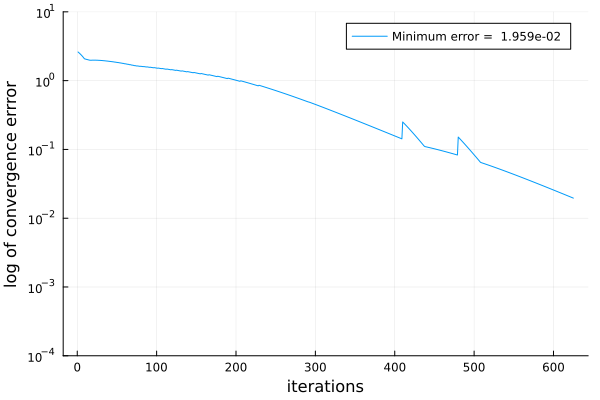

LoadError: BoundsError: attempt to access 1-element Vector{Plots.Subplot} at index [2]

In [5]:
# Resetting dd, ini, act so that we don't have to scroll up every time
dd, ini, act = FUSE.init(:D3D, do_plot=false);
#dd, ini, act = FUSE.init(:ITER, init_from=:ods; do_plot=false)

act.ActorTGLF.warn_nn_train_bounds=true
# We are running with the fast tglfnn model
act.ActorTGLF.nn = true
act.ActorTGLF.sat_rule = :sat0
act.ActorTGLF.electromagnetic = false

act.ActorFluxMatcher.rho_transport = 0.3:0.1:0.8
act.ActorFluxMatcher.max_iterations = 1000
act.ActorFluxMatcher.optimizer_algorithm = :anderson # or :jacobian_based
act.ActorFluxMatcher.step_size = 0.5
act.ActorFluxMatcher.verbose = true
act.ActorFluxMatcher.evolve_rotation = :fixed
act.ActorFluxMatcher.evolve_pedestal = false

# show pre evolution
display(act.ActorFluxMatcher)
display(plot(dd.core_profiles, label=" before"))

#FUSE.ActorPedestal(dd,act)
actor_transport = FUSE.ActorFluxMatcher(dd, act)

# show after
display(plot!(dd.core_profiles, label=" after"))

# plot the flux_matching 
display(plot(dd.core_transport))

### For the channels that we evolved the flux_matching looks spot on!

In [6]:
# let's see if our end result satisfies quasi neutral
IMAS.is_quasi_neutral(dd)

true

#### How does TGLF compare to TGLF_nn in this case?

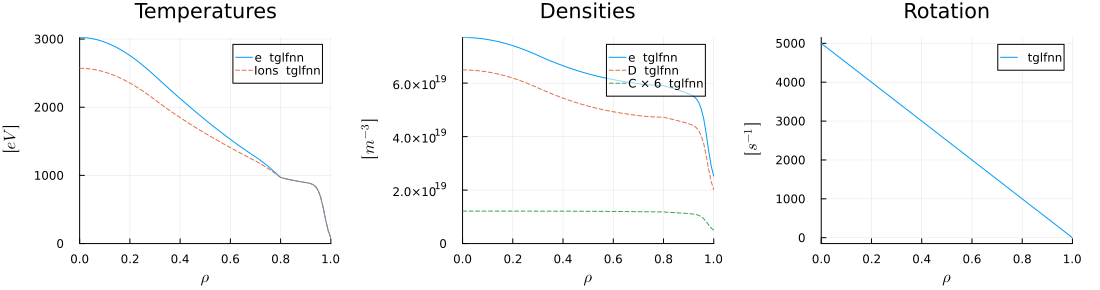

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------


┌ Error: ERROR running TGLF
│ ...
│ timeout: failed to run command ‘tglf’: No such file or directory
│ 
│ real	0m0.004s
│ user	0m0.001s
│ sys	0m0.003s
└ @ TGLFNN ~/.julia/dev/TGLFNN/src/TGLFNN.jl:429
┌ Error: ERROR running TGLF
│ ...
│ timeout: failed to run command ‘tglf’: No such file or directory
│ 
│ real	0m0.004s
│ user	0m0.002s
│ sys	0m0.001s
└ @ TGLFNN ~/.julia/dev/TGLFNN/src/TGLFNN.jl:429
┌ Error: ERROR running TGLF
│ ...
│ timeout: failed to run command ‘tglf’: No such file or directory
│ 
│ real	0m0.004s
│ user	0m0.001s
│ sys	0m0.003s
└ @ TGLFNN ~/.julia/dev/TGLFNN/src/TGLFNN.jl:429
┌ Error: ERROR running TGLF
│ ...
│ timeout: failed to run command ‘tglf’: No such file or directory
│ 
│ real	0m0.003s
│ user	0m0.001s
│ sys	0m0.002s
└ @ TGLFNN ~/.julia/dev/TGLFNN/src/TGLFNN.jl:429
┌ Error: ERROR running TGLF
│ ...
│ timeout: failed to run command ‘tglf’: No such file or directory
│ 
│ real	0m0.003s
│ user	0m0.002s
│ sys	0m0.001s
└ @ TGLFNN ~/.julia/dev/TGLFNN/src/TGLFNN.jl:429


LoadError: failed process: Process(setenv(`[4mbash[24m [4mcommand.sh[24m`; dir="/tmp/jl_dQDSCy"), ProcessExited(127)) [127]

Stacktrace:
 [1] [0m[1mpipeline_error[22m
[90m   @ [39m[90m./[39m[90m[4mprocess.jl:565[24m[39m[90m [inlined][39m
 [2] [0m[1mrun[22m[0m[1m([22m::[0mCmd; [90mwait[39m::[0mBool[0m[1m)[22m
[90m   @ [39m[90mBase[39m [90m./[39m[90m[4mprocess.jl:480[24m[39m
 [3] [0m[1mrun[22m
[90m   @ [39m[90m./[39m[90m[4mprocess.jl:477[24m[39m[90m [inlined][39m
 [4] [0m[1mrun_tglf[22m[0m[1m([22m[90minput_tglf[39m::[0mTGLFNN.InputTGLF[0m[1m)[22m
[90m   @ [39m[35mTGLFNN[39m [90m~/.julia/dev/TGLFNN/src/[39m[90m[4mTGLFNN.jl:417[24m[39m
 [5] [0m[1m#397[22m
[90m   @ [39m[90m~/.julia/dev/FUSE/src/actors/transport/[39m[90m[4mtglf_actor.jl:69[24m[39m[90m [inlined][39m
 [6] [0m[1m(::Base.var"#929#934"{FUSE.var"#397#401"})[22m[0m[1m([22m[90mr[39m::[0mBase.RefValue[90m{Any}[39m, [90margs[39m::[0mTuple[90m{TGLFNN.InputTGLF}[39m[0m[1m)[22m
[90m   @ [39m[90mBase[39m [90m./[39m[90m[4masyncmap.jl:100[24m[39m
 [7] [0m[1mmacro expansion[22m
[90m   @ [39m[90m./[39m[90m[4masyncmap.jl:234[24m[39m[90m [inlined][39m
 [8] [0m[1m(::Base.var"#945#946"{Base.var"#929#934"{FUSE.var"#397#401"}, Channel{Any}, Nothing})[22m[0m[1m([22m[0m[1m)[22m
[90m   @ [39m[90mBase[39m [90m./[39m[90m[4mtask.jl:484[24m[39m

In [7]:
act.ActorTGLF.nn = false

# Dialing the iterations a bit down since tglf_sat0 is much slower than it's neural net counterpart
act.ActorFluxMatcher.max_iterations = 30

display(plot(dd.core_profiles, label="  tglfnn"))
FUSE.ActorFluxMatcher(dd, act)

display(plot!(dd.core_profiles, label="  tglf"))
display(plot(dd.core_transport))

#### As you can see TGLF sat0 converges well except for a point @ rho = 0.5
#### However, as you can see this doesn't affect the results very much!